Part 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('/content/Picture2.jpg')
print(f"Original Image Size: {image.shape[:2]}")

def display_image(title, img):
    plt.figure()
    plt.imshow(img)
    plt.title(f"{title} - Size: {img.shape[:2]}")
    plt.show()

Original Image Size: (265, 396)


In [3]:
resized_linear = cv2.resize(image, (400, 400), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (400, 400), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (400, 400), interpolation=cv2.INTER_CUBIC)

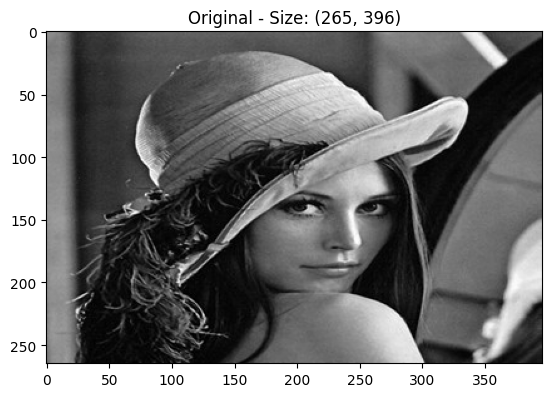

In [4]:
display_image("Original", image)

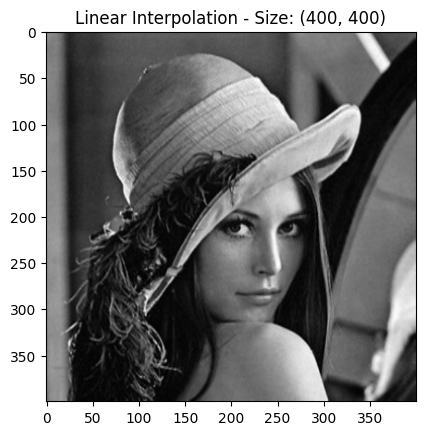

In [5]:
display_image("Linear Interpolation", resized_linear)

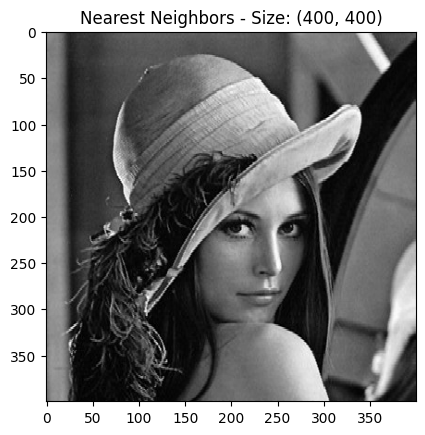

In [6]:
display_image("Nearest Neighbors", resized_nearest)

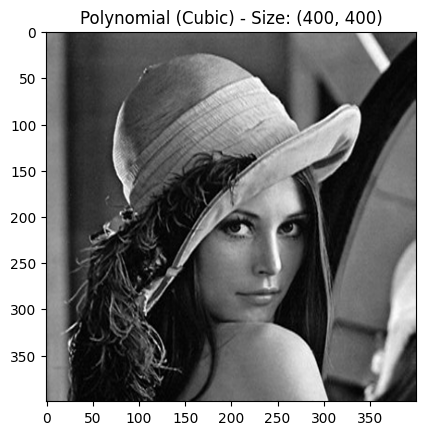

In [7]:
display_image("Polynomial (Cubic)", resized_polynomial)

In [8]:
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

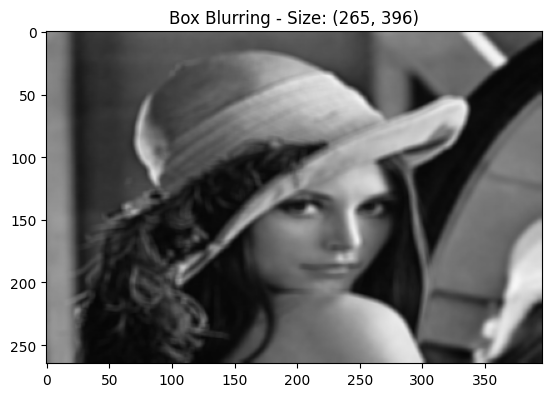

In [9]:
display_image("Box Blurring", box_blur)

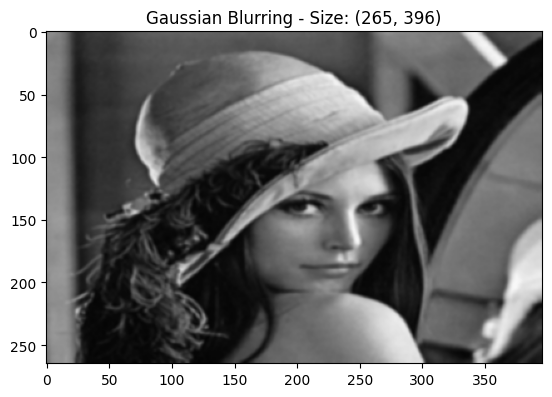

In [10]:
display_image("Gaussian Blurring", gaussian_blur)

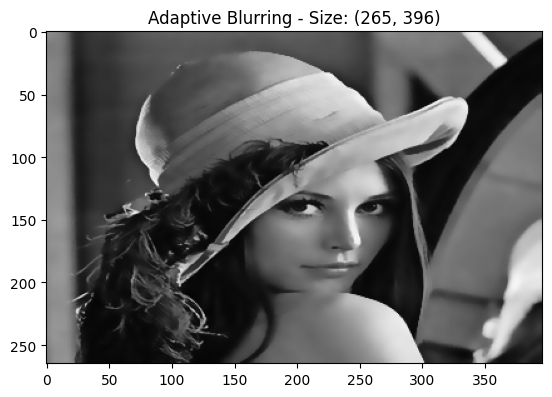

In [11]:
display_image("Adaptive Blurring", adaptive_blur)

Part 2

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
# Reshape and normalize
train_X = train_X.reshape(train_X.shape[0], -1) / 255.0
test_X = test_X.reshape(test_X.shape[0], -1) / 255.0

# Split
X_train, X_test, y_train, y_test = train_test_split(
    train_X, train_y, test_size=0.2, stratify=train_y, random_state=42
)
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

Evaluating Random Forest...

Accuracy: 0.9665
Precision: 0.9665
Recall: 0.9665
F1-Score: 0.9665
Confusion Matrix:
[[1176    1    1    1    1    0    1    0    4    0]
 [   0 1325   11    6    1    0    1    2    1    1]
 [   3    2 1157    5    5    0    3    5   10    2]
 [   1    3   20 1160    0   10    2    9   15    6]
 [   3    3    2    1 1135    1    3    2    2   16]
 [   2    1    0   12    3 1044    7    0    8    7]
 [   6    3    0    0    4   12 1156    0    3    0]
 [   1    7   17    2    7    0    0 1203    2   14]
 [   3   12    4   11    4   11    5    1 1111    8]
 [   3    5    1   16    9    5    0   10   10 1131]]
AUC: 0.9988527993250009



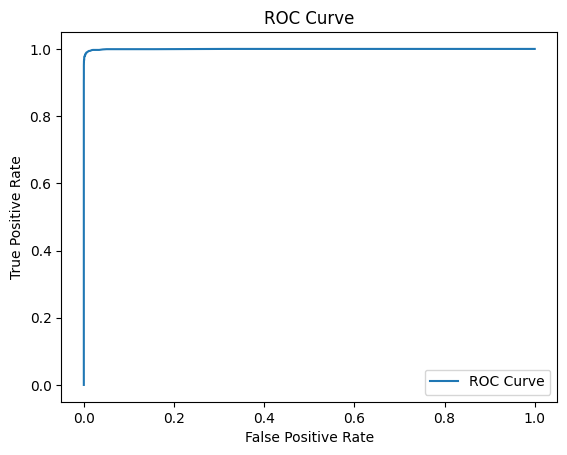

Evaluating AdaBoost...

Accuracy: 0.5967
Precision: 0.6581
Recall: 0.5967
F1-Score: 0.6031
Confusion Matrix:
[[ 369    1   28    8    2  749   13    3    8    4]
 [   0 1015  154   71    0    2    0   16   84    6]
 [   7   29  849   26   19   46   59   10  120   27]
 [   7   45   69  672    8  207    8   14  123   73]
 [   4    2   27   24  653   91   12   90   36  229]
 [  12   30   22  122   36  760    3   17   48   34]
 [  13   14  103   20   99  206  675    3   43    8]
 [  10   24   62    6   18   22    1  711   21  378]
 [   3   23   36  123   12  145    0    1  773   54]
 [   3    8   16   35  157   62    3  191   32  683]]
AUC: 0.9263928703913645



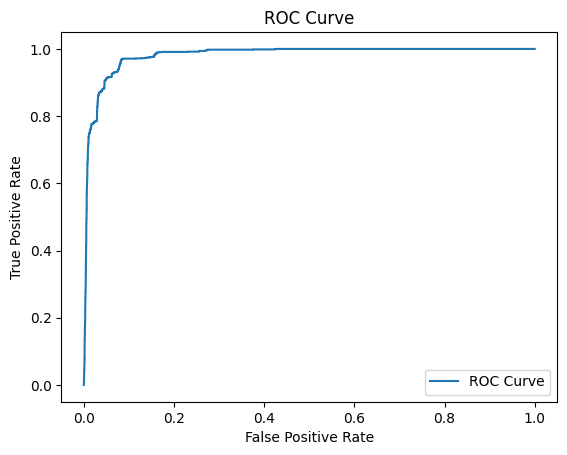

In [14]:
#evaluate
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Perform K-Fold cross-validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    for train_idx, val_idx in kfold.split(X_train, y_train):
        X_ktrain, X_kval = X_train[train_idx], X_train[val_idx]
        y_ktrain, y_kval = y_train[train_idx], y_train[val_idx]
        model.fit(X_ktrain, y_ktrain)
        accuracy_scores.append(model.score(X_kval, y_kval))

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else "N/A"

    # Print
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"AUC: {auc}\n")

    # ROC curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        plt.plot(fpr, tpr, label="ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

# Evaluate two algorithms
for name in ["Random Forest", "AdaBoost"]:
    print(f"Evaluating {name}...\n")
    evaluate_model(models[name], X_train, y_train, X_test, y_test)